In [2]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1','feature2','feature3'])
df1['target'] = 0

# Use pd.concat instead of append
df = pd.concat([df, df1], ignore_index=True)

# Shuffle the DataFrame
df = df.sample(40).reset_index(drop=True)


In [3]:
df.head()

,feature1,feature2,feature3,target
0,-0.367548,-1.137460,-1.322148,1
1,0.177061,-0.598109,1.226512,0
2,0.420623,0.411620,-0.071324,1
3,1.968435,-0.547788,-0.679418,1
4,-2.506230,0.146960,0.606195,1


In [4]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [5]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [6]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [7]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [8]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [9]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

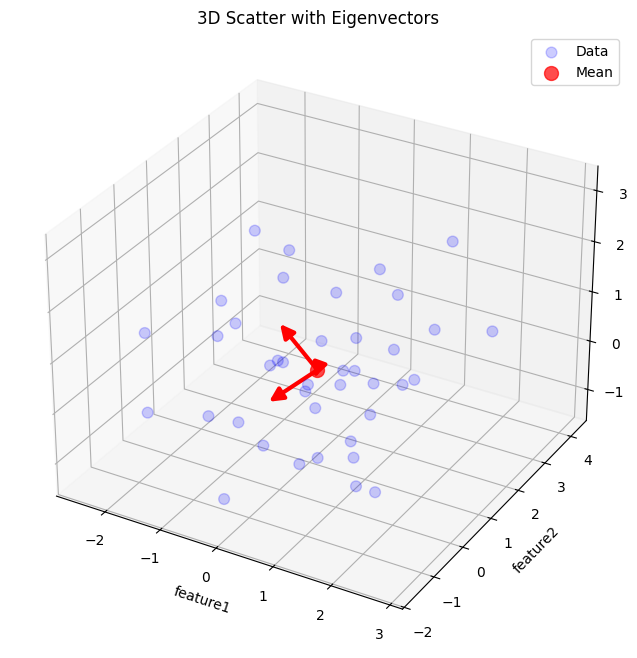

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

# --- Data Generation ---
np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df = pd.DataFrame(class1_sample, columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df1 = pd.DataFrame(class2_sample, columns=['feature1','feature2','feature3'])
df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)
df = df.sample(40).reset_index(drop=True)

# --- Eigenvector Computation ---
features = df[['feature1', 'feature2', 'feature3']].values
cov_matrix = np.cov(features, rowvar=False)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# --- Arrow3D Class with do_3d_projection ---
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# --- Plotting ---
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['feature1'], df['feature2'], df['feature3'],
           c='blue', marker='o', alpha=0.2, s=60, label='Data')

mean = features.mean(axis=0)
ax.scatter([mean[0]], [mean[1]], [mean[2]],
           c='red', marker='o', s=100, alpha=0.7, label='Mean')

for v in eig_vecs.T:
    arrow = Arrow3D([mean[0], mean[0] + v[0]],
                    [mean[1], mean[1] + v[1]],
                    [mean[2], mean[2] + v[2]],
                    mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(arrow)

ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('feature3')
ax.set_title('3D Scatter with Eigenvectors')
ax.legend()
plt.show()


In [16]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [17]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.354836,1.250883,1
1,0.905912,-1.035385,0
2,-0.546230,-0.226495,1
3,-1.005401,-0.772965,1
4,1.538160,1.185298,1


In [18]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()